In [1]:
%matplotlib notebook

In [2]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
loss_summary = [[], [], []]
acc_summary = [[], [], []]

In [6]:
n_classes = 10
nm_epochs = 80
batch_size = 125

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float', [None, 10])

In [7]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [8]:
def maxpool2d(x):
    #                        size of window         movement of window
    return tf.nn.max_pool(x, ksize=[1,28,28,1], strides=[1,1,1,1], padding='VALID')

In [9]:
def neural_network_model_0(x): # 28546
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,1,8], stddev=0.1)),
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,8,8], stddev=0.1)),               
               'W_conv3':tf.Variable(tf.truncated_normal([3,3,8,8], stddev=0.1)),               
               'W_conv4':tf.Variable(tf.truncated_normal([3,3,8,8], stddev=0.1)),
               'W_conv5':tf.Variable(tf.truncated_normal([3,3,8,16], stddev=0.1)),
               'W_conv6':tf.Variable(tf.truncated_normal([3,3,16,32], stddev=0.1)),
               'W_conv7':tf.Variable(tf.truncated_normal([3,3,32,64], stddev=0.1)),
               'W_fc':tf.Variable(tf.truncated_normal([64,32], stddev=0.1)),
               'out':tf.Variable(tf.truncated_normal([32, n_classes], stddev=0.1))}

    biases = {'b_conv1':tf.Variable(tf.constant(0.1, shape=[8])),
               'b_conv2':tf.Variable(tf.constant(0.1, shape=[8])),
               'b_conv3':tf.Variable(tf.constant(0.1, shape=[8])),
               'b_conv4':tf.Variable(tf.constant(0.1, shape=[8])),
               'b_conv5':tf.Variable(tf.constant(0.1, shape=[16])),
               'b_conv6':tf.Variable(tf.constant(0.1, shape=[32])),
               'b_conv7':tf.Variable(tf.constant(0.1, shape=[64])),
               'b_fc':tf.Variable(tf.constant(0.1, shape=[32])),
               'out':tf.Variable(tf.constant(0.1, shape=[n_classes]))}

    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv3 = tf.nn.relu(conv2d(conv2, weights['W_conv3']) + biases['b_conv3'])
    conv4 = tf.nn.relu(conv2d(conv3, weights['W_conv4']) + biases['b_conv4'])
    conv5 = tf.nn.relu(conv2d(conv4, weights['W_conv5']) + biases['b_conv5'])
    conv6 = tf.nn.relu(conv2d(conv5, weights['W_conv6']) + biases['b_conv6'])
    conv7 = tf.nn.relu(conv2d(conv6, weights['W_conv7']) + biases['b_conv7'])
    conv7 = maxpool2d(conv7)
    
    fc = tf.reshape(conv7,[-1, 64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output

In [10]:
def neural_network_model_1(x): # 28106
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,1,16], stddev=0.1)),
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,16,32], stddev=0.1)),
               'W_conv3':tf.Variable(tf.truncated_normal([3,3,32,64], stddev=0.1)),
               'W_fc':tf.Variable(tf.truncated_normal([64,64], stddev=0.1)),
               'out':tf.Variable(tf.truncated_normal([64, n_classes], stddev=0.1))}

    biases = {'b_conv1':tf.Variable(tf.constant(0.1, shape=[16])),
               'b_conv2':tf.Variable(tf.constant(0.1, shape=[32])),
               'b_conv3':tf.Variable(tf.constant(0.1, shape=[64])),
               'b_fc':tf.Variable(tf.constant(0.1, shape=[64])),
               'out':tf.Variable(tf.constant(0.1, shape=[n_classes]))}

    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1']) 
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv3 = tf.nn.relu(conv2d(conv2, weights['W_conv3']) + biases['b_conv3'])
    conv3 = maxpool2d(conv3)

    fc = tf.reshape(conv3,[-1, 64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output

In [11]:
def neural_network_model_2(x): # 27914
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,1,192], stddev=0.1)),
               'W_fc':tf.Variable(tf.truncated_normal([192,128], stddev=0.1)),
               'out':tf.Variable(tf.truncated_normal([128, n_classes], stddev=0.1))}

    biases = {'b_conv1':tf.Variable(tf.constant(0.1, shape=[192])),
               'b_fc':tf.Variable(tf.constant(0.1, shape=[128])),
               'out':tf.Variable(tf.constant(0.1, shape=[n_classes]))}

    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool2d(conv1)

    fc = tf.reshape(conv1,[-1, 192])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output

In [12]:
def train_neural_network(x):
    num_batches_per_epoch = mnist.train.num_examples // batch_size
    predictions = [neural_network_model_0(x), neural_network_model_1(x), neural_network_model_2(x)]
    for i, prediction in enumerate(predictions):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1)), tf.float32))
        optimizer = tf.train.AdamOptimizer().minimize(cost)

        config=tf.ConfigProto()
        config.gpu_options.allow_growth=True
        
        with tf.Session(config=config) as sess:
            sess.run(tf.global_variables_initializer())

            for epoch in range(nm_epochs):
                epoch_loss = 0.0
                epoch_acc = 0.0
                for _ in range(0, num_batches_per_epoch):
                    epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                    _, c, a = sess.run([optimizer, cost, accuracy], feed_dict={x: epoch_x, y: epoch_y})
                    epoch_loss += c / num_batches_per_epoch
                    epoch_acc += a / num_batches_per_epoch
                loss_summary[i].append(epoch_loss)
                acc_summary[i].append(epoch_acc)

                print('Epoch', epoch, 'completed out of',nm_epochs,'loss:',epoch_loss, 'accuracy:', epoch_acc)

In [13]:
train_neural_network(x)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Epoch 0 completed out of 80 loss: 0.7874585321003749 accuracy: 0.7345818192613388
Epoch 1 completed out of 80 loss: 0.17334931749342505 accuracy: 0.9466363629156873
Epoch 2 completed out of 80 loss: 0.12536961850710215 accuracy: 0.9616181836886833
Epoch 3 completed out of 80 loss: 0.10269020071507182 accuracy: 0.9681454575874595
Epoch 4 completed out of 80 loss: 0.0872801794183695 accuracy: 0.9730363661592669
Epoch 5 completed out of 80 loss: 0.08014711645135485 accuracy: 0.9752181853760391
Epoch 6 completed out of 80 loss: 0.06532047071007335 accuracy: 0.9799636410041318
Epoch 7 completed out of 80 loss: 0.06494054181649433 accuracy: 0.9792181860316913
Epoch 8 completed out of 80 loss: 0.056959611839953496 accuracy: 0.9822909139774096
Epoch 9 completed out of 80 loss: 0.05643258452817625 accuracy: 0

Epoch 13 completed out of 80 loss: 0.05660962316482748 accuracy: 0.9825090966441447
Epoch 14 completed out of 80 loss: 0.05323251901215622 accuracy: 0.9835454576394814
Epoch 15 completed out of 80 loss: 0.0512863379934887 accuracy: 0.983781822567641
Epoch 16 completed out of 80 loss: 0.048025546576404426 accuracy: 0.9850363671779676
Epoch 17 completed out of 80 loss: 0.04646532173501329 accuracy: 0.9853090925650201
Epoch 18 completed out of 80 loss: 0.04619683607227423 accuracy: 0.9854363667694045
Epoch 19 completed out of 80 loss: 0.04149409982545134 accuracy: 0.9869818217375106
Epoch 20 completed out of 80 loss: 0.041076317933832554 accuracy: 0.9873636385256646
Epoch 21 completed out of 80 loss: 0.03710715835437771 accuracy: 0.9877818211913151
Epoch 22 completed out of 80 loss: 0.03475113420943008 accuracy: 0.9887818191539205
Epoch 23 completed out of 80 loss: 0.03502466586545448 accuracy: 0.9889636370268785
Epoch 24 completed out of 80 loss: 0.0346807228284888 accuracy: 0.9882000020

Epoch 31 completed out of 80 loss: 0.42846184132451387 accuracy: 0.856890910322014
Epoch 32 completed out of 80 loss: 0.424772631512447 accuracy: 0.8573454539884214
Epoch 33 completed out of 80 loss: 0.4294610022821208 accuracy: 0.8556363647634317
Epoch 34 completed out of 80 loss: 0.42762259370224043 accuracy: 0.8557636366649095
Epoch 35 completed out of 80 loss: 0.41901962428607714 accuracy: 0.8608363644643253
Epoch 36 completed out of 80 loss: 0.41902274916117827 accuracy: 0.858472727239131
Epoch 37 completed out of 80 loss: 0.4133757975629784 accuracy: 0.8607454547827872
Epoch 38 completed out of 80 loss: 0.41381725320084534 accuracy: 0.8618545455011436
Epoch 39 completed out of 80 loss: 0.40825431167402004 accuracy: 0.863036364046008
Epoch 40 completed out of 80 loss: 0.4054108421233574 accuracy: 0.8635818178003464
Epoch 41 completed out of 80 loss: 0.4065747140822084 accuracy: 0.8633272733200666
Epoch 42 completed out of 80 loss: 0.4006488498977642 accuracy: 0.8650363636287766
Ep

<IPython.core.display.Javascript object>


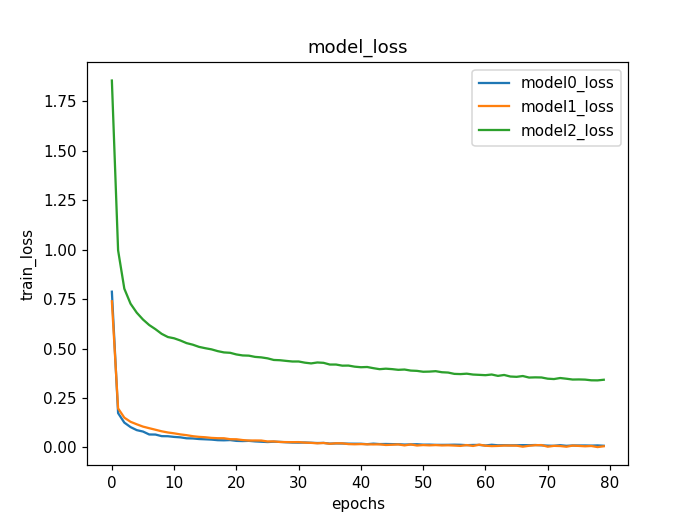

In [14]:
plt.figure()
for i in range(3):
    plt.plot(np.arange(0, nm_epochs), loss_summary[i], label="model"+str(i)+"_loss")
plt.xlabel('epochs')
plt.ylabel('train_loss')
plt.title('model_loss')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


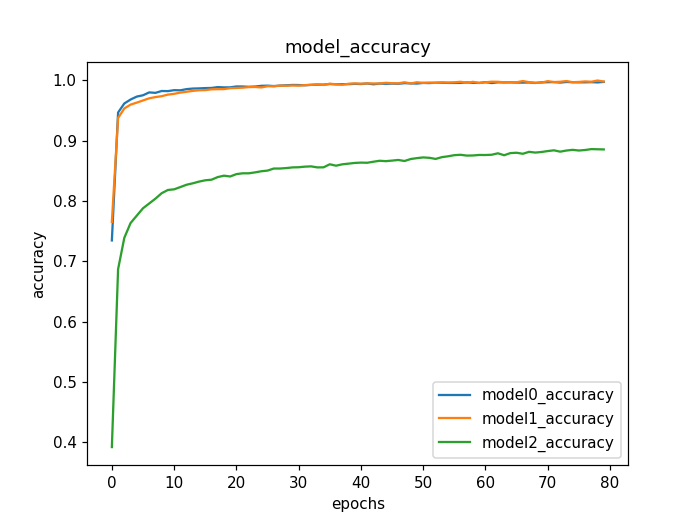

In [15]:
plt.figure()
for i in range(3):
    plt.plot(np.arange(0, nm_epochs), acc_summary[i], label="model"+str(i)+"_accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model_accuracy')
plt.legend(loc='best')
plt.show()